In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider

In [7]:
train = pd.read_csv('data/train.csv', index_col='_id')

In [8]:
train.T

_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07,3c41d96da147ab5a745938cbd85e2313,1a87845e9d5740a2619acd478da08459,e07d393a5d9b174b39f6064823386759,e5a3da407a75e8475a3e1bb6a804b1c7,42b112272cd4851b4d65d1ed464fbbd9,...,5bda10424327b19dacd7ad441eb96f87,3b645c9f6fe700760d6eb129fb39cbaa,bab14c06a4521a1be42886d06a949524,2cc26ab0e721e5e9c6669413f75da257,dafc873488714ecc84cb5dff649e8495,4161f19fed82fd2c937291775bfa7891,96e1c42e88b9e93256e1538b2001b98f,55f91ed39163c14985c2a8ad85b80635,01734878c05d2dded8c726a622fdba9e,46d0d25dfd1def79632dd437261d0b5c
age,54,36,53,34,29,56,33,36,70,32,...,31,33,43,58,36,58,37,35,40,29
job,technician,services,blue-collar,blue-collar,services,self-employed,admin.,management,retired,blue-collar,...,admin.,blue-collar,management,unemployed,management,retired,management,admin.,management,admin.
marital,married,single,married,married,single,single,married,married,married,married,...,single,married,married,divorced,married,married,married,married,married,single
education,professional.course,basic.4y,basic.4y,basic.9y,university.degree,basic.9y,university.degree,university.degree,professional.course,professional.course,...,university.degree,basic.6y,university.degree,professional.course,unknown,professional.course,university.degree,high.school,university.degree,university.degree
default,unknown,no,no,no,no,unknown,no,no,no,unknown,...,no,no,no,no,unknown,unknown,no,no,no,no
housing,no,no,yes,yes,yes,no,yes,yes,no,yes,...,no,yes,no,no,yes,no,no,yes,yes,yes
loan,no,no,no,yes,no,no,yes,no,no,no,...,yes,no,no,yes,no,no,no,no,no,no
contact,cellular,telephone,cellular,telephone,telephone,telephone,cellular,cellular,cellular,cellular,...,cellular,cellular,cellular,cellular,cellular,telephone,telephone,cellular,telephone,cellular
month,aug,may,aug,may,aug,jun,may,nov,oct,may,...,nov,jul,aug,aug,jul,may,jun,oct,may,jul
day_of_week,tue,mon,mon,wed,fri,thu,mon,wed,thu,thu,...,wed,tue,wed,thu,thu,tue,thu,thu,wed,mon


In [9]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    df_preproc = df_preproc.drop(['contact', 'day_of_week', 'month'], axis=1)
    
    df_preproc.loc[:, ["housing", "loan", "default" ]] = \
    df_preproc.loc[:, ["housing", "loan", "default"]].replace({'no':0, 'yes':1, 'unknown':2, 'nonexistent':0})
    
    df_preproc.loc[:, 'marital'] = df_preproc.loc[:, 'marital'].replace({'married':1, 'single':0, 'divorced':0, 'unknown':0})
    df_preproc.loc[:, 'pdays'] = df_preproc.loc[:, 'pdays'].replace({999:0})
    df_preproc.loc[:, 'poutcome'] = df_preproc.loc[:, 'poutcome'].replace({'failure':0, 'nonexistent':1, 'success':2})
    
    
    output = pd.get_dummies(df_preproc, columns=['education', 'job'])
    
    return output

In [10]:
df_preproc = train.pipe(preproc)

In [11]:
df_preproc.T

_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07,3c41d96da147ab5a745938cbd85e2313,1a87845e9d5740a2619acd478da08459,e07d393a5d9b174b39f6064823386759,e5a3da407a75e8475a3e1bb6a804b1c7,42b112272cd4851b4d65d1ed464fbbd9,...,5bda10424327b19dacd7ad441eb96f87,3b645c9f6fe700760d6eb129fb39cbaa,bab14c06a4521a1be42886d06a949524,2cc26ab0e721e5e9c6669413f75da257,dafc873488714ecc84cb5dff649e8495,4161f19fed82fd2c937291775bfa7891,96e1c42e88b9e93256e1538b2001b98f,55f91ed39163c14985c2a8ad85b80635,01734878c05d2dded8c726a622fdba9e,46d0d25dfd1def79632dd437261d0b5c
age,54.000,36.000,53.000,34.000,29.000,56.000,33.000,36.00,70.000,32.000,...,31.000,33.000,43.000,58.000,36.000,58.000,37.000,35.000,40.000,29.000
marital,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.00,1.000,1.000,...,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000
default,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.00,0.000,2.000,...,0.000,0.000,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000
housing,0.000,0.000,1.000,1.000,1.000,0.000,1.000,1.00,0.000,1.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000
loan,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.00,0.000,0.000,...,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
duration,87.000,291.000,182.000,180.000,6.000,64.000,312.000,20.00,585.000,196.000,...,212.000,376.000,398.000,142.000,171.000,427.000,288.000,194.000,295.000,333.000
campaign,1.000,1.000,1.000,2.000,1.000,2.000,2.000,1.00,1.000,2.000,...,2.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,2.000,2.000
pdays,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,6.000,0.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.00,3.000,1.000,...,6.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
poutcome,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.00,2.000,0.000,...,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000


In [12]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 36 columns):
age                              24712 non-null int64
marital                          24712 non-null int64
default                          24712 non-null int64
housing                          24712 non-null int64
loan                             24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
poutcome                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
target            

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [25]:
y = df_preproc['target'].values

In [26]:
train = df_preproc.drop('target', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, y ,test_size=0.2, random_state = 123)

In [29]:
scores_test = []
scores_train = []

for k in range(1, 15):
    # Your Code Here    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    y_hat_test = model.predict_proba(X_test,)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train,)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

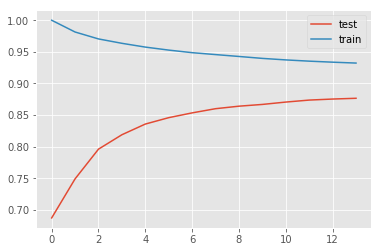

In [30]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

In [31]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=13))
])

In [32]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform'))])

In [33]:
y_hat = model.predict(X_test)

In [34]:
y_hat_proba = model.predict_proba(X_test, )

In [35]:
roc_auc_score(y_test, y_hat_proba[:, 1])

0.8753338092265244

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123

In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000019510278>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000000195103C8>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [38]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9}

In [39]:
random_search.best_score_

0.9339106192263883